In [1]:
import numpy as np
import matplotlib.pyplot as plt

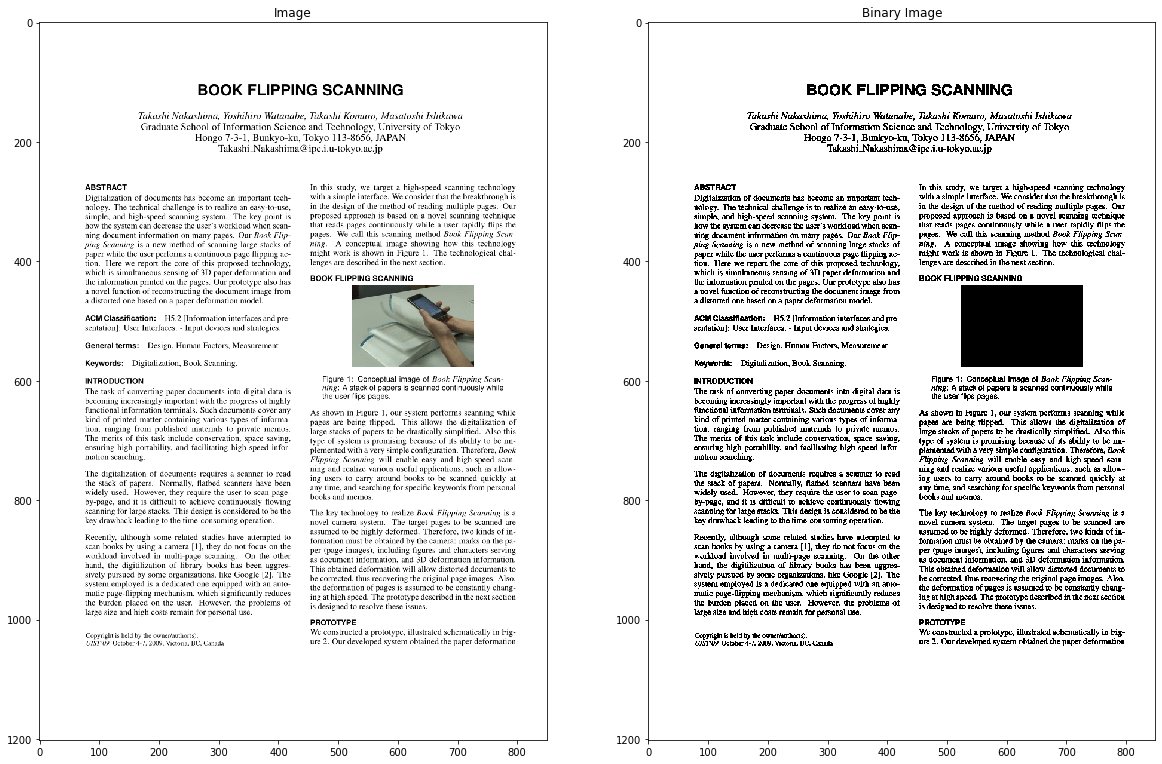

In [2]:
from skimage.color import rgb2gray

path = '/Users/hassaanmuzammil/Downloads/largepreview.png'
img = plt.imread(path)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Image')

img_gray = rgb2gray(img)
img_bin = (img_gray > 0.9).astype('uint16')

plt.subplot(1,2,2)
plt.title('Binary Image')
plt.imshow(img_bin, cmap='gray')

plt.show()

In [3]:
def threshold_transform(lst, th):
    new_lst = []
    count = 0
    flag = False
    for i in range(len(lst)):
        if lst[i] == 0:
            if count > th:
                for j in range(count):
                    new_lst.append(1)
            if count <= th:
                for j in range(count):
                    new_lst.append(0)
            new_lst.append(0)
            count = 0
        else:
            count += 1
        #print(i,new_lst,count)
    for i in range(count):
        if count > th:
            new_lst.append(1)
        else:
            new_lst.append(0)
    return new_lst

In [4]:
def rlsa_horizontal(arr, th=8):
    """
    Input: 
          2d numpy array (arr) consisting of 0's and 1's
          threshold (th) for consecutive number of 1's to be converted to 0's
    Output:
          2d array (result) after rlsa horizontal transformation
    """
    result = np.zeros(arr.shape)
    
    for i in range(arr.shape[0]):
        row = threshold_transform(list(arr[i]), th)
        result[i] = np.array(row)
    
    plt.figure(figsize=(10,10))
    plt.imshow(result, cmap='gray')
    plt.title('Horizontal RLSA')
    plt.show()
    
    return result

In [5]:
def rlsa_vertical(arr, th=8):
    """
    Input: 
          2d numpy array (arr) consisting of 0's and 1's
          threshold (th) for consecutive number of 1's to be converted to 0's
    Output:
          2d array (result) after rlsa vertical transformation
    """
    
    result = np.zeros(arr.shape)
    
    for i in range(arr.shape[1]):
        col = threshold_transform(list(arr[:,i]), th)
        result[:,i] = np.array(col)
    
    plt.figure(figsize=(10,10))
    plt.imshow(result, cmap='gray')
    plt.title('Vertical RLSA')
    plt.show()
    
    return result

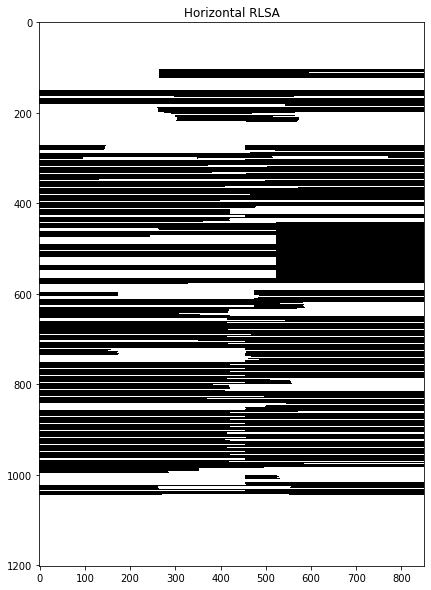

In [6]:
result_horizontal = rlsa_horizontal(img_bin, 250).astype('uint16')

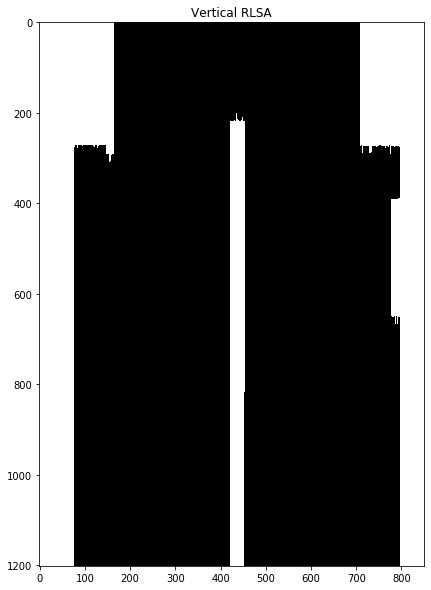

In [7]:
result_vertical = rlsa_vertical(img_bin, th=250).astype('uint16')

In [12]:
def rlsa_(result_horizontal, result_vertical):
    
    result = np.logical_or(result_horizontal, result_vertical)
    
    plt.figure(figsize=(10,10))
    plt.imshow(result, cmap='gray')
    plt.title('Combined RLSA')
    plt.show()
    
    return result

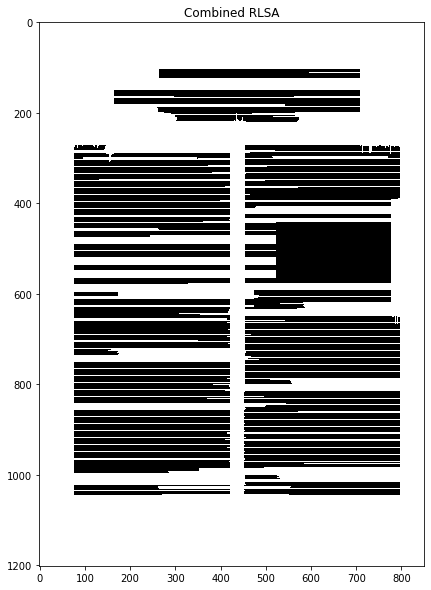

In [13]:
result = rlsa_(result_horizontal, result_vertical)